In [187]:
import matplotlib as plt
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import pandas as pd
%matplotlib inline
from sklearn import datasets,linear_model,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

data = pd.read_csv(r'BANK.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))
data.y.replace(('yes', 'no'), (1, 0), inplace=True)


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [105]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [99]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [115]:
data['education'] = np.where(data['education']=='basic.9y','Basic',data['education'])
data['education'] = np.where(data['education']=='basic.6y','Basic',data['education'])
data['education'] = np.where(data['education']=='basic.4y','Basic',data['education'])

In [116]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [33]:
data['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

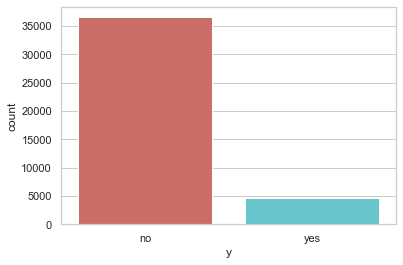

Response rate:
no     88.734583
yes    11.265417
Name: y, dtype: float64


<Figure size 432x288 with 0 Axes>

In [39]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')


print('Response rate:')
print(data['y'].value_counts()/data.shape[0]*100)

In [109]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [110]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [111]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750,0.150000


In [189]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


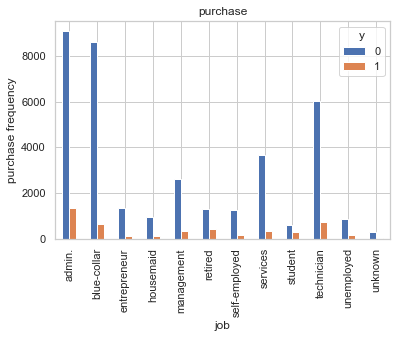

<Figure size 432x288 with 0 Axes>

In [119]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('purchase')
plt.xlabel('job')
plt.ylabel('purchase frequency')
plt.show()
plt.savefig('job')

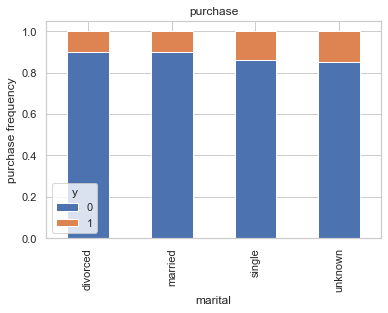

<Figure size 432x288 with 0 Axes>

In [126]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('purchase')
plt.xlabel('marital')
plt.ylabel('purchase frequency')
plt.show()
plt.savefig('marital')

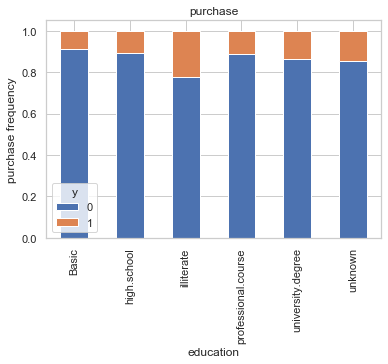

<Figure size 432x288 with 0 Axes>

In [128]:
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('purchase')
plt.xlabel('education')
plt.ylabel('purchase frequency')
plt.show()
plt.savefig('marital')

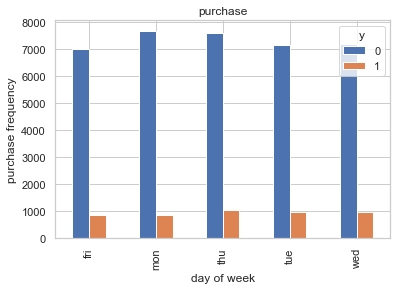

<Figure size 432x288 with 0 Axes>

In [133]:
table = pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('purchase')
plt.xlabel('day of week')
plt.ylabel('purchase frequency')
plt.show()
plt.savefig('marital')

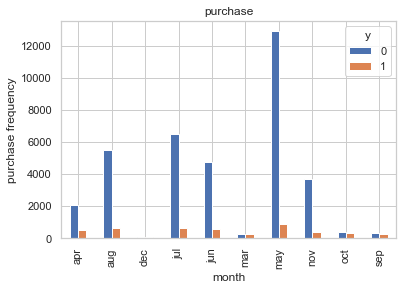

<Figure size 432x288 with 0 Axes>

In [136]:
table = pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('purchase')
plt.xlabel('month')
plt.ylabel('purchase frequency')
plt.show()
plt.savefig('marital')

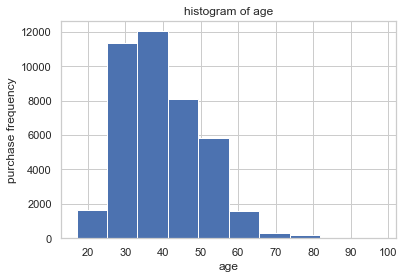

<Figure size 432x288 with 0 Axes>

In [137]:
data.age.hist()
plt.title('histogram of age')
plt.xlabel('age')
plt.ylabel('purchase frequency')
plt.show()
plt.savefig('age')

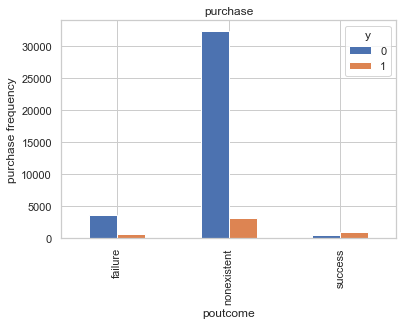

<Figure size 432x288 with 0 Axes>

In [140]:
table = pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('purchase')
plt.xlabel('poutcome')
plt.ylabel('purchase frequency')
plt.show()
plt.savefig('poutcome')

In [169]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list= 'var'+'_'+var
    cat_list = pd.get_dummies(data[var],prefix=var)
    print(var,'---',cat_list.columns)
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


job --- Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')
marital --- Index(['marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown'],
      dtype='object')
education --- Index(['education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown'],
      dtype='object')
default --- Index(['default_no', 'default_unknown', 'default_yes'], dtype='object')
housing --- Index(['housing_no', 'housing_unknown', 'housing_yes'], dtype='object')
loan --- Index(['loan_no', 'loan_unknown', 'loan_yes'], dtype='object')
contact --- Index(['contact_cellular', 'contact_telephone'], dtype='object')
month --- Index(['month_apr', 'mont

In [171]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [191]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
print(X)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day

In [192]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,18)
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)




F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default sol

F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False  True  True  True  True
 False False  True  True  True False False False  True False False False
  True  True  True]
[38 36 13 44  1 14 16 17  1 27  7  1 18 41 42  1 34  1  1 30 25 40 12 28
 15 45  5 19  4  6 39 35 20  9  1  3 46 21 32 37 22 33 29 10  1  1  1  1
 23 24  1  1  1 31 11  8  1 43 26  2  1  1  1]


In [193]:
pref_indexes = list(np.where(rfe.ranking_==1)[0])
cols = list(np.asarray(X)[pref_indexes])
print(cols)


['previous', 'euribor3m', 'job_blue-collar', 'job_retired', 'job_services', 'job_student', 'default_no', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov', 'day_of_week_mon', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [181]:
len(cols)

18

In [197]:
X = data_final[cols]
y = data_final['y']

In [199]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())











Optimization terminated successfully.
         Current function value: 0.281005
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:                  0.2018
Time:                        18:09:53   Log-Likelihood:                -11574.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2112      0.051      4.142      0.000       0.111       0.311

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)




F:\anaconda\envs\faraz_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
y_pred = logreg.predict(X_test)
print('prediction of y is :',y_pred)
logmodel_score = logreg.score(X_test, y_test)
print('This is how our Model Scored:\n', logmodel_score)

prediction of y is : [0 0 0 ... 0 0 0]
This is how our Model Scored:
 0.899166464352189


In [204]:
print('accuracy is : {:.2f}'.format(logreg.score(X_test,y_test)))

accuracy is : 0.90


In [210]:
print('accuracy is : {:.2f}'.format(logreg.score(X_train,y_train)))

accuracy is : 0.90


In [217]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.899166464352189
